In [ ]:
''' want to see if i can make a nice plot of from this timecourse benchmarking data '''

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(columns=['file', 'cerebra', 'gatk'])
df.file = [1,2,3,4,5,6,7,7.1]
df

,file,cerebra,gatk
0,1.0,NaN,NaN
1,2.0,NaN,NaN
2,3.0,NaN,NaN
3,4.0,NaN,NaN
4,5.0,NaN,NaN
5,6.0,NaN,NaN
6,7.0,NaN,NaN
7,7.1,NaN,NaN


In [3]:
df.loc[0, 'cerebra'] = 17.62
df.loc[1, 'cerebra'] = 17.62
df.loc[2, 'cerebra'] = 18.65
df.loc[3, 'cerebra'] = 32.68
df.loc[4, 'cerebra'] = 33.08
df.loc[5, 'cerebra'] = 33.08
df.loc[6, 'cerebra'] = 35.05 # fudged
df.loc[7, 'cerebra'] = 44.15

df.loc[0, 'gatk'] = 27.07
df.loc[1, 'gatk'] = 55.11
df.loc[2, 'gatk'] = 83.55
df.loc[3, 'gatk'] = 111.74
df.loc[4, 'gatk'] = 139.42
df.loc[5, 'gatk'] = 165.58
df.loc[6, 'gatk'] = 193.35
df.loc[7, 'gatk'] = 194.50

df

,file,cerebra,gatk
0,1.0,17.62,27.07
1,2.0,17.62,55.11
2,3.0,18.65,83.55
3,4.0,32.68,111.74
4,5.0,33.08,139.42
5,6.0,33.08,165.58
6,7.0,35.05,193.35
7,7.1,44.15,194.5


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x='gatk', y='file', data=df)

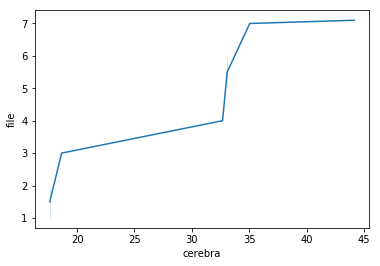

In [5]:
ax = sns.lineplot(x='cerebra', y='file', data=df)

In [6]:
df_m = pd.melt(df, id_vars=['file'])
df_m.columns = ['vcf_count', 'method', 'minutes_elapsed']
df_m

,vcf_count,method,minutes_elapsed
0,1.0,cerebra,17.62
1,2.0,cerebra,17.62
2,3.0,cerebra,18.65
3,4.0,cerebra,32.68
4,5.0,cerebra,33.08
5,6.0,cerebra,33.08
6,7.0,cerebra,35.05
7,7.1,cerebra,44.15
8,1.0,gatk,27.07
9,2.0,gatk,55.11


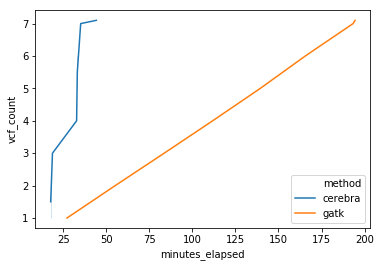

In [15]:
# hey this is what i want!!
fig = sns.lineplot(x='minutes_elapsed', y='vcf_count', hue='method', data=df_m)

In [19]:
fig.figure.savefig('cerebra_vs_funcotator_runtime.pdf')

In [8]:
# what if we look logarithmically? 
    # not super interesting...
import numpy as np

df_m.minutes_elapsed = np.float32(df_m.minutes_elapsed)
df_m['log_minutes'] = np.log(df_m.minutes_elapsed)

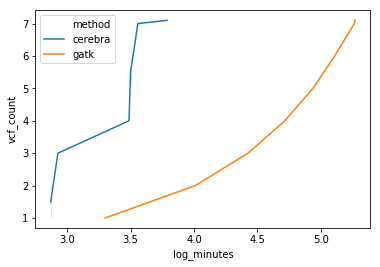

In [9]:
ax = sns.lineplot(x='log_minutes', y='vcf_count', hue='method', data=df_m)

In [2]:
#/////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////

In [22]:
cb_raw = pd.read_csv('/Users/lincoln.harris/Desktop/cerebra_benchmarking - laud_vcf_100.csv')
cb_raw = pd.DataFrame(cb_raw.cerebra)
cb_raw

,cerebra
0,0:05
1,1:02
2,NaN
3,NaN
4,NaN
5,1:06
6,1:37
7,NaN
8,2:15
9,NaN


In [34]:
# convert to minutes (w/decimal)
for i in range(0, len(cb_raw.cerebra)):
    val = cb_raw.cerebra.iloc[i]
    if not pd.isnull(val):
        mins = int(val.split(':')[0])
        secs = int(val.split(':')[1])
        toAdd = secs / 60
        frac = mins + toAdd
        
        cb_raw.cerebra.iloc[i] = frac

In [36]:
# now add in the 10:26 to fire up the genome trees
26 / 60 

0.43333333333333335

In [38]:
toAdd = 10.4333333

cb_raw.cerebra = cb_raw.cerebra + toAdd
cb_raw # nice

,cerebra
0,10.5167
1,11.4667
2,NaN
3,NaN
4,NaN
5,11.5333
6,12.05
7,NaN
8,12.6833
9,NaN


In [43]:
cb_raw = cb_raw.rename(columns={'cerebra':'minutes_elapsed'})
cb_raw['method'] = 'cerebra'
cb_raw['file_number'] = 0
cb_raw

,minutes_elapsed,method,file_number
0,10.5167,cerebra,0
1,11.4667,cerebra,0
2,NaN,cerebra,0
3,NaN,cerebra,0
4,NaN,cerebra,0
5,11.5333,cerebra,0
6,12.05,cerebra,0
7,NaN,cerebra,0
8,12.6833,cerebra,0
9,NaN,cerebra,0


In [45]:
# fill in file_number...theres gotta be an easier way of doing this
    # ideally i could exclude this column and just tell seaborn to 
    # plot the dataframe index as the y-axis
    
for i in range(0, len(cb_raw.file_number)):
    cb_raw.file_number.iloc[i] = i + 1

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[(0, 35)]

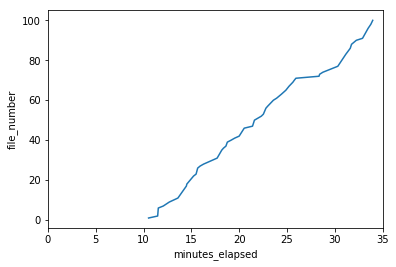

In [52]:
# now plot
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x='minutes_elapsed', y='file_number', data=cb_raw)
ax.set(xlim=(0, 35))

In [68]:
# maybe i want to add a 'zero' value to my cerebra times
cb_raw = cb_raw.append({'minutes_elapsed' : 0.0, 'method' : 'cerebra', 'file_number' : 0}, ignore_index=True)

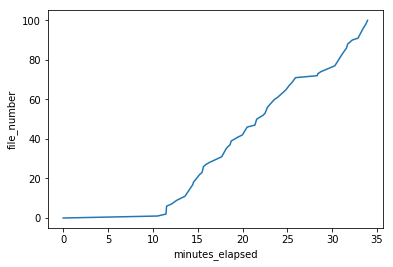

In [69]:
# sweet, this looks better
ax = sns.lineplot(x='minutes_elapsed', y='file_number', data=cb_raw)

In [70]:
#/////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////

In [108]:
funco_df = pd.read_csv('/Users/lincoln.harris/Desktop/funco_benchmarking_laud_vcf100.csv')
funco_df

,gatk
0,1.17
1,1.21
2,2.29
3,1.40
4,0.86
5,1.55
6,1.02
7,1.50
8,0.72
9,1.92


In [109]:
funco_df = funco_df.rename(columns={'gatk':'raw_time'})
funco_df['method'] = 'gatk'
funco_df['file_number'] = 0
funco_df

,raw_time,method,file_number
0,1.17,gatk,0
1,1.21,gatk,0
2,2.29,gatk,0
3,1.40,gatk,0
4,0.86,gatk,0
5,1.55,gatk,0
6,1.02,gatk,0
7,1.50,gatk,0
8,0.72,gatk,0
9,1.92,gatk,0


In [110]:
for i in range(0, len(funco_df.file_number)):
    funco_df.file_number.iloc[i] = i + 1

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [111]:
total_time = 0
for i in range(0, len(funco_df.index)):
    curr_time = funco_df.raw_time.iloc[i]
    total_time = total_time + curr_time
    
total_time - 139.4 # about the same

136.13999999999996

In [112]:
# lets add in minutes_elapsed col
funco_df['minutes_elapsed'] = ''
elapsed_time = 0.0

for i in range(0, len(funco_df.index)):
    curr_time = funco_df.raw_time.iloc[i]
    elapsed_time = elapsed_time + curr_time
    funco_df.minutes_elapsed.iloc[i] = elapsed_time
    
    
funco_df

,raw_time,method,file_number,minutes_elapsed
0,1.17,gatk,1,1.17
1,1.21,gatk,2,2.38
2,2.29,gatk,3,4.67
3,1.40,gatk,4,6.07
4,0.86,gatk,5,6.93
5,1.55,gatk,6,8.48
6,1.02,gatk,7,9.5
7,1.50,gatk,8,11
8,0.72,gatk,9,11.72
9,1.92,gatk,10,13.64


In [113]:
funco_df = funco_df.drop([100])

In [114]:
# looks good
funco_df.minutes_elapsed.iloc[99] = 139.4
funco_df

,raw_time,method,file_number,minutes_elapsed
0,1.17,gatk,1,1.17
1,1.21,gatk,2,2.38
2,2.29,gatk,3,4.67
3,1.40,gatk,4,6.07
4,0.86,gatk,5,6.93
5,1.55,gatk,6,8.48
6,1.02,gatk,7,9.5
7,1.50,gatk,8,11
8,0.72,gatk,9,11.72
9,1.92,gatk,10,13.64


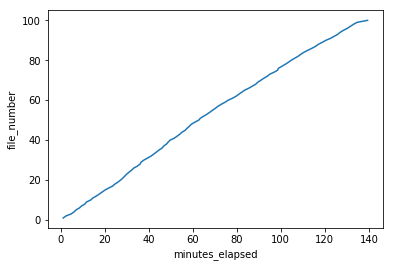

In [115]:
# nice
ax = sns.lineplot(x='minutes_elapsed', y='file_number', data=funco_df)

In [116]:
# now lets merge
funco_df = funco_df.drop(['raw_time'], axis=1)
funco_df = funco_df[['minutes_elapsed', 'method', 'file_number']]

In [121]:
merged_df = funco_df.append(cb_raw)

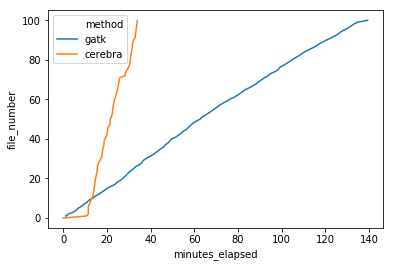

In [123]:
fig = sns.lineplot(x='minutes_elapsed', y='file_number', hue='method', data=merged_df)

In [124]:
fig.figure.savefig('cerebra_vs_funcotator_runtime_100.pdf')